# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt # importar librerías
import numpy as np

In [ ]:
df_orders = pd.read_csv('instacart_orders.csv', sep=';')
df_products = pd.read_csv('products.csv', sep=';')
df_aisles = pd.read_csv('aisles.csv', sep=';')
df_departments = pd.read_csv('departments.csv', sep=';')
df_order_products = pd.read_csv('order_products.csv', sep=';')# leer conjuntos de datos en los DataFrames

In [11]:
display(df_orders)
df_orders.info() # mostrar información del DataFrame

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [12]:
display(df_products)
df_products.info()# mostrar información del DataFrame

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
display(df_aisles)
df_products.info()# mostrar información del DataFrame

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
display(df_departments)
df_departments.info()# mostrar información del DataFrame

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [15]:
display(df_order_products)
df_order_products.info()# mostrar información del DataFrame

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Se evidencia que al mostrar los diferentes Dataframe de forma automatica esta genera, realizar un ajuste a su llamado para tener un dataframe ajustado.
Es por esto que se realiza una modificacion en su llamado para que refleje un dataframe con informacion separada y lista para realizar los analisis de la informacion respectivos.
Otro aspecto es que al realizar una validacion de los dataframes se evidencia que se presenta una correlacion entre los diferentes datos, lo cual permitira realizar cruce de informacion para toma de decisiones.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Los pasos a nivel general seria:
1. Validacion de cada uno de los dataframe en su comprobacion principal que la informacioneste correcta.
2. Realizar la comprobacion y cruce de los dataframe con el fin de confirmar o rechazar las hipotesis que se presente o de novedades que requiramos comprobar.
3. Graficar los datos para un mejor analisis.
4. Tomar decisiones y mejoras al proceso.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [16]:
# Revisa si hay pedidos duplicados
dup_col = df_orders.duplicated().sum()#se llama la funcion duplicated para establecer de todo mi dataframe si hay informacion duplicada
dup_col1 = df_orders[df_orders['order_id'].duplicated(keep=False)]['order_id'].tolist()#se llama cuales son los datos de las ordenes duplicadas

print()
print("se presenta un total de:", dup_col, "duplicados")# se muestra la cantidad de duplicados se muestra
print()
print("la lista de los duplicados de las ordenes son:")
print(dup_col1[:15]) #se trae en forma de lista las ordenes que estan duplicadas 
print()
print("Muestra de comprobacion de duplicados:")
display(df_orders[df_orders['order_id']==1918001])#se realiza una comprobacion de los datos en donde toda la fila es igual

display(df_orders[df_orders['order_id']==794638])#se realiza una comprobacion de los datos en donde toda la fila es igual

display(df_orders[df_orders['order_id']==1112182])#se realiza una comprobacion de los datos en donde toda la fila es igual


se presenta un total de: 15 duplicados

la lista de los duplicados de las ordenes son:
[1918001, 794638, 408114, 2845099, 794638, 1112182, 1782114, 2125197, 2160484, 2160484, 1918001, 1021560, 467134, 1919531, 2282673]

Muestra de comprobacion de duplicados:


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
30371,1918001,188546,14,3,2,16.0
230807,1918001,188546,14,3,2,16.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
164581,1112182,202304,84,3,2,6.0
273805,1112182,202304,84,3,2,6.0


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si se presentan duplicados en el Dataframe de ordenes, se presenta un total de 15 duplicados, como se evidencia en el detalle de arriba del codigo, se presenta cuales son las ordenes que se repiten y adicional se evidencia que los datos repetidos es toda la informacion del pedido. En elpunto anterior se realiza una comprobacion de los repetidos para comprobar que informacion se muestra y efectivamente las filas se repite en su totalidad. Adicional se evidencia que las transacciones se realizaron el miercoles a las 2 am

In [18]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
comp1 = df_orders[(df_orders['order_dow']== 3) & (df_orders['order_hour_of_day'] == 2)] #se realiza el  filtrado siguiendo los parametros de miércoles a las 2:00 a.m. 
comp1.info()
print()
print("Se presentan: ", comp1.duplicated().sum(), "filas duplicados") #comprobando nuevamente este dataframe reducido y aplicando el duplicated, 
#refleja que todos los duplicados estan en este dia y en esta franja de hora, en donde se recomienda verificar que sucedio este dia y realizar las
# correcciones respectivas

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 4838 to 477526
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                121 non-null    int64  
 1   user_id                 121 non-null    int64  
 2   order_number            121 non-null    int64  
 3   order_dow               121 non-null    int64  
 4   order_hour_of_day       121 non-null    int64  
 5   days_since_prior_order  114 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.6 KB

Se presentan:  15 filas duplicados


¿Qué sugiere este resultado?

Al realizar una verificacion a esta franja establecida de miércoles a las 2:00 a.m. nos presenta 121 datos en donde se realiza un zoom aplicando duplicated ya que tenemos una hipotesis de que en esta franja son todos los datos duplicados. Realizando y aplicando nuevamente el duplicated a este dataframe filtrado con los parametros, este nos refleja que los datos duplicados de todo el dataframe esta concentrado y focalizado en esta area, es por esto que se solicita validar lo que sucedio en esta franja de trabajo y realizar los cambios respectivos.

In [19]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

In [20]:
# Vuelve a verificar si hay filas duplicadas
dup_col = df_orders.duplicated().sum()
print(dup_col)

0


In [21]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
dup_ID = df_orders['order_id'].duplicated().sum()
print(dup_ID)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Se establece que en la franja del dia el miércoles (3) a las 2:00 a.m. (2), se establece que se presenta una informacion con estos registros ya que aparecen que tuvieron una duplicidad de informacion, 15 codigos de codigos de compra aparecieron con duplicidad de informacion en toda la fila.
Para lo cual y realizar los ajustes respectivos se realiza una identificacion, limpieza de estos datos. Permitiendo que esto no genere una distrocion en los datos, posteriormente se eliminan los datos, se realiza una comprobacion de que no se presente duplicados en el dataframe. 

### `products` data frame

In [22]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())

0


In [23]:
# Revisa únicamente si hay ID de departamentos duplicados
print(df_products['department_id'].value_counts(dropna=True).sort_index())

department_id
1     4008
2      548
3     1516
4     1684
5     1054
6     1139
7     4366
8      972
9     1858
10      38
11    6564
12     907
13    5372
14    1117
15    2092
16    3449
17    3085
18    1081
19    6264
20    1322
21    1258
Name: count, dtype: int64


In [24]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()#se realiza el cambio de la columna a mayuscula
pn1= df_products['product_name'].value_counts()#se realiza la validacion de cuantas veces se repite el nombre de producto
print(pn1)
print()
print("Se presenta ", df_products.duplicated().sum(), "duplicados")#se realiza la comprobacion de cuantos duplicados se presenta
print()
display(df_products[df_products['product_name']=="GREEN TEA WITH GINSENG AND HONEY"])
#se extrae un valor repetido del nombre del producto se evidencia que solo se presenta duplicado es en el nombre de producto, 
#el resto de informacion no se repite, ya que tiene un product_id diferente

product_name
GREEN TEA WITH GINSENG AND HONEY                                        3
CARROT AND CELERY STICKS                                                2
APRICOT ENERGY BAR                                                      2
TOP THE TATER CHIVE & ONION SOUR CREAM                                  2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD    2
                                                                       ..
ALL NATURAL CHICKEN APPLE SAUSAGE                                       1
QUARTERED ARTICHOKE HEARTS                                              1
BIG EYE IPA                                                             1
UNSTOPABLES LUSH                                                        1
FRESH FOAMING CLEANSER                                                  1
Name: count, Length: 48332, dtype: int64

Se presenta  0 duplicados



,product_id,product_name,aisle_id,department_id
2037,2038,GREEN TEA WITH GINSENG AND HONEY,94,7
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
19813,19814,GREEN TEA WITH GINSENG AND HONEY,94,7


In [25]:
# Revisa si hay nombres duplicados de productos no faltantes
print(df_products[df_products['product_name'].isna()])
#se extrae los valor ausentes del nombre del producto se evidencia que se presenta nombres sin informacion de nombre de producto, 
#adicional se identifica que todo el departamento 21 se ubica el producto que no tiene un nombre del producto

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se establece de este dataframe que no se presentan duplicados ya que cada producto tiene un ID unico.
Se valida que hay 21 departamentos en los cuales el numero 21 se focalizan todos los productos que no estan con un nombre de producto sin información y se establece que para el analsis este departamento se debe de no tener en cuenta.

### `departments` data frame

In [26]:
# Revisa si hay filas totalmente duplicadas
print("Se presenta ", df_departments.duplicated().sum(), "duplicados")
print()
print(df_departments[df_departments['department_id'].isna()])

Se presenta  0 duplicados

Empty DataFrame
Columns: [department_id, department]
Index: []


In [27]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print(df_departments['department_id'].value_counts(dropna=True).sort_index())

department_id
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
Name: count, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se valida el dataframe donde no presenta informacion duplicada.
Se afirma del punto del dataframe de products "el cual se indicaba que el depatamento numero 21 se focalizan todos los productos que no estan con un nombre de producto sin información o Missing y se establece que para el analsis este departamento se debe de no tener en cuenta" este departamento se le puede informar a la empresa realizar una depuración de esta informacion.
Adicional se realiza comprobacion de valores duplicados el cual no presenta, lo mismo de valores ausentes lo cual no presenta.

### `aisles` data frame

In [28]:
# Revisa si hay filas totalmente duplicadas
print("Se presenta ", df_aisles.duplicated().sum(), "duplicados")

Se presenta  0 duplicados


In [29]:
# Revisa únicamente si hay IDs duplicadas de Viveres
print(df_aisles['aisle_id'].duplicated().sum())
print(df_aisles['aisle'].duplicated().sum())
print(df_aisles[df_aisles['aisle'].isna()])

0
0
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se valida el dataframe donde no presenta informacion duplicada.
Adicional se realiza comprobacion de valores duplicados el cual no presenta, lo mismo de valores ausentes lo cual no presenta.

### `order_products` data frame

In [30]:
# Revisa si hay filas totalmente duplicadas
print("Se presenta ", df_order_products.duplicated().sum(), "duplicados")

Se presenta  0 duplicados


In [31]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_order_products['order_id'].duplicated().sum())
print()
print(df_order_products['product_id'].duplicated().sum())
print()
print(df_order_products['order_id'].value_counts(dropna=False))
print()
display(df_order_products[df_order_products['order_id']==61355])
print()
print(df_order_products['product_id'].value_counts(dropna=False))
print()
display(df_order_products[df_order_products['product_id']==24852])
print()
print(df_order_products[df_order_products['add_to_cart_order'].isna()])

4094961

4499434

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
3076918      1
2499566      1
556604       1
171279       1
1461911      1
Name: count, Length: 450046, dtype: int64



,order_id,product_id,add_to_cart_order,reordered
57981,61355,5322,NaN,0
149404,61355,39475,45.0,0
247893,61355,8594,NaN,0
269840,61355,14233,5.0,0
345399,61355,24010,51.0,0
...,...,...,...,...
4426514,61355,29270,15.0,0
4482168,61355,24964,33.0,0
4515077,61355,6760,27.0,0
4521208,61355,16262,62.0,0



product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
47987        1
26408        1
24435        1
36946        1
40024        1
Name: count, Length: 45573, dtype: int64



,order_id,product_id,add_to_cart_order,reordered
100,194806,24852,3.0,1
109,3176371,24852,1.0,1
151,1442232,24852,3.0,1
310,1400886,24852,4.0,0
362,1926105,24852,3.0,1
...,...,...,...,...
4544722,3006846,24852,2.0,1
4544731,2713872,24852,7.0,1
4544823,2774827,24852,2.0,1
4544842,3402221,24852,1.0,1



         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se realiza una validacion del dataframe en los cuales se aborda de la siguiente manera:

    * se realiza la validacion de duplicados general en el dataframe, pero en este no se presenta duplicado alguno.
    * posteriormente se realiza una validacion de las columnas que se presentan en el dataframe, donde si se presentan "order_id" y "product_id" repetidos pero eso indica que hay ordenes con diferentes productos, lo cual indica que se repiten, y para el caso de "product_id" el caso es que es un producto que aplica para diferentes ordenes, con base en esta informacion se establece que estos repetidos no impactan.
    * Por ultimo se realiza una validacion de la columna add_to_cart_order en donde se presenta valores ausente y establece que el producto no tuvo un orden especifico en la compra. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [32]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products[df_products['product_name'].isna()])
print()
print(df_products['product_name'].value_counts(dropna=False))

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]

product_name
NaN                                                                     1258
GREEN TEA WITH GINSENG AND HONEY                                           3
CARROT AND CELERY STICKS                                                   2
APRICOT ENERGY BAR                                        

Describe brevemente cuáles son tus hallazgos.

Al realizar la validacion de dos forma diferentes y enfocadas a los valores ausentes se establece y se afirma lo comentado lineas arriba, donde se aclaraba que hay un despartamento dondes se focaliza datos sin resultados.

In [33]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

j1 = df_products[df_products['product_name'].isna()]
j1 = j1['aisle_id'].value_counts(dropna=False)
print(j1)
print()
j2 = df_aisles.iloc[99]
print(j2)

aisle_id
100    1258
Name: count, dtype: int64

aisle_id        100
aisle       missing
Name: 99, dtype: object


Describe brevemente cuáles son tus hallazgos.

Se realiza una extracción de informacion y todos los 1258 datos ausentes de "df_products" estan relacionados al pasillo 100 que esta relacionado al pasillo de "missing o perdidos".

In [34]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
j3 = df_products[df_products['product_name'].isna()]
j3 = j3['department_id'].value_counts(dropna=False)
print(j3)
print()
j4 = df_departments.iloc[20]
print(j4)

department_id
21    1258
Name: count, dtype: int64

department_id         21
department       missing
Name: 20, dtype: object


Describe brevemente cuáles son tus hallazgos.

Se realiza una extracción de informacion y todos los 1258 datos ausentes de "df_products" estan relacionados al departamento 21 que esta relacionado al departamento de "missing o perdidos".

In [35]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(j2) #se extrae del pasillo (aisle) a que hace referencia el ID 100, elcual indica que es de "missing" o perdido
print()
print(j4) #se extrae del departamento (department) a que hace referencia el ID 21, elcual indica que es de "missing" o perdido

aisle_id        100
aisle       missing
Name: 99, dtype: object

department_id         21
department       missing
Name: 20, dtype: object


Describe brevemente cuáles son tus hallazgos.

Se establece que ambos codigos estan focalizados para identificar pasillo (aisle) missing y  departamento (department) missing 

In [37]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
print(df_products[df_products['product_name']=="Unknown"])

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se realiza el llenado de los ausentes con la palabra "Unknown" con el fin de establecer y realizar los analisis siguientes de informacion y una vez se reemplaza ya quedan inmerson en el dataframe.

### `orders` data frame

In [39]:
# Encuentra los valores ausentes
print(df_orders [df_orders ['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [40]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(df_orders[(df_orders['days_since_prior_order'].isna()) & (df_orders['order_number'] > 1)])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Realizando el analisis a los valores ausentes se establece que estos se presentan en el dataframe de orders debido a que estos se presentan en la columna de "days_since_prior_order" ya que son ordenes numero 1, en lo que indican que los clientes no han realizado mas compras, fue su unica compra hasta el momento que se tiene registro en el sistema.
En el respectivo analsisi se trataron primero validar cuales eran los ausentes focalizados en la columna 'days_since_prior_order' y posteriormente se realiza un filtro doble donde se establece los valores ausentes y un condicional de las ordenes mayores a 1, en donde se evidencia que todos los ausentes de 'days_since_prior_order' son todas una primera orden.

### `order_products` data frame

In [41]:
# Encuentra los valores ausentes
print(df_order_products [df_order_products ['add_to_cart_order'].isna()])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [42]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("El valor mínimo y máximo para la columna add_to_cart_order es: ", min(df_order_products['add_to_cart_order'] ), "y ", max(df_order_products['add_to_cart_order'] ))
print()
print(df_order_products[df_order_products['order_id']==2449164])

El valor mínimo y máximo para la columna add_to_cart_order es:  1.0 y  64.0

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
128360    2449164       14386                NaN          0
187426    2449164       32864               10.0          1
193859    2449164        8518                NaN          0
234913    2449164       24497               32.0          1
...           ...         ...                ...        ...
4279508   2449164        7781               55.0          1
4335855   2449164       25295               54.0          1
4407623   2449164        4920                NaN          1
4423417   2449164       35912                NaN          0
4480899   2449164       47759               11.0          1

[76 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Al validar la informacion se establece que para la orden en especifica se toma un producto que no se tiene establecido el orden en que se escogio y fue incluido dentro de la orden, ademas se establece que la mayor cantidad de productos que se incluyeron y que fueron regitrados dentro de una orden fue de 64 articulos.

In [43]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
c1 = df_order_products [df_order_products ['add_to_cart_order'].isna()]
c1 = c1['order_id']
print(c1)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [44]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
oinan = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']
print(oinan)
print()
grpoinan = df_order_products[df_order_products['order_id'].isin(oinan)]
print(grpoinan)
print()
s_pid= df_order_products[df_order_products['add_to_cart_order'].isna()].groupby('order_id')['product_id'].count()
print(s_pid)
print()
print("el valor minimo que se presenta es: ", s_pid.min())

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

         order_id  product_id  add_to_cart_order  reordered
267       2094761       31469               57.0          1
737       2449164        5068                NaN          0
1742      2997021        4920               37.0          0
3463       871281       40063               61.0          1
3535       171934       36397                7.0          0
...           ...         ...                ...        ...
4543519   2621907       32018               28.0          1
4544672    102236       34688               49.0          0
4544708   2256933       41544               21.0          0
4544771    180546       12741               46.0          1
4544810   2136777       20072               10.0          0

[5316 rows x 4 columns]

or

Describe brevemente cuáles son tus hallazgos.

Al realizar la agrupacion de los resultados se evidencia que los valores ausentes son aquellos productos que se tomaron para una orden pero no tuvieron un orden especifico para tomarlo.

In [45]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
print(df_order_products)
print()
df_order_products.info()
print()
can_convert = np.array_equal(df_order_products['add_to_cart_order'], df_order_products['add_to_cart_order'].astype('int'))
print("El resultado de la validacion es", can_convert, "donde podemos realizar el cambio de la columna")
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
print()
print(df_order_products.dtypes)

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4545007 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se realiza el calculo y ajuste de valores ausentes y se modifican por un numero grande (999) para su identificacion y no afectacion dentro del flujo de exogencia de los productos hacia las ordenes en el dataframe, ademas se realiza el cambio de tipo de variable para una mejor analisis de los datos y cruce entre las tablas.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Al realizar todo el prepocesamiento de los datos se establecen y focalizan en valores ausentes y duplicados:

para estas novedades se abordan de la siguiente manera:

    - se fozaliza en los dataframe y permite la toma de acciones para que no se presente de nuevo, caso puntual de ordenes que se presentan duplicadas en dia y en hora.
    - Se establecen que los dataframe por defecto presentan informacion perdida o missing, donde se focaliza en los pasillos (aislate) y en los departamentos (department), donde permite una diferenciacion y focalizacion de los datos.
    - realizacion de los valores ausentes con el fin de rellenar los valores ausentes y esto permita que en el cruce de los datos, la informacion sea confiable y permita la toma de decisiones. 

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [46]:
print(df_orders['order_hour_of_day'].describe())
print()
print("las horas oscilas desde las:", min(df_orders['order_hour_of_day'] )," horas hasta las ", max(df_orders['order_hour_of_day'] )," horas")

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

las horas oscilas desde las: 0  horas hasta las  23  horas


In [47]:
print(df_orders['order_dow'].describe())
print()
print("los dias oscilan desde el dia:", min(df_orders['order_dow'] ),"que representa a domingo hasta el dia ", max(df_orders['order_dow'] )," que representa a sabado")

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64

los dias oscilan desde el dia: 0 que representa a domingo hasta el dia  6  que representa a sabado


Se establece que los valores estan dentro de los rangos establecido de las horas y los dias para un analisis confiable

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: user_id, dtype: int64


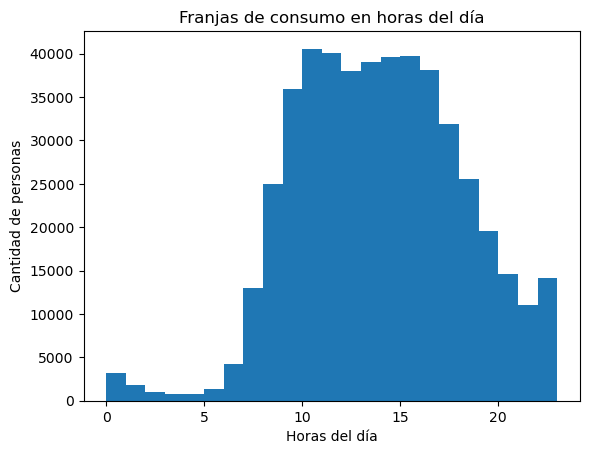

In [48]:
h_dia = df_orders.pivot_table(index='order_hour_of_day', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='order_dow', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='user_id', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='count' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )
#print(h_dia)

deck_val = df_orders.groupby('order_hour_of_day')['user_id'].count()
print(deck_val)

                  
df_orders['order_hour_of_day'].plot(kind='hist', bins=23, x='order_hour_of_day', y='user_id', title='Franjas de consumo en horas del día')
plt.ylabel('Cantidad de personas')
plt.xlabel('Horas del día')
plt.show()

la franja de horario que presenta mayor compra es a las 10 am en donde se presenta el pico mas alto, adicional se establece que desde las 10 am hasta las 14 pm es la franja de mayor movimiento y es donde se debe soportar el proceso.

### [A3] ¿Qué día de la semana compran víveres las personas?

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: user_id, dtype: int64
order_hour_of_day   0    1    2    3    4    5    6     7     8     9   ...  \
order_dow                                                               ...   
0                  533  337  188  128  108  171  463  1752  3908  5650  ...   
1                  565  269  145  104  104  246  757  2320  4751  7262  ...   
2                  462  240  136  104  109  196  653  1900  3485  5057  ...   
3                  373  215  106  101  108  170  643  1732  3125  4490  ...   
4                  324  229  114  109  100  198  594  1787  3136  4332  ...   
5                  459  219  123   99  118  229  654  1933  3373  4794  ...   
6                  464  254  177  125  118  161  451  1619  3246  4311  ...   

order_hour_of_day    14    15    16    17    18    19    20    21    22   23  
order_dow                                                                     
0              

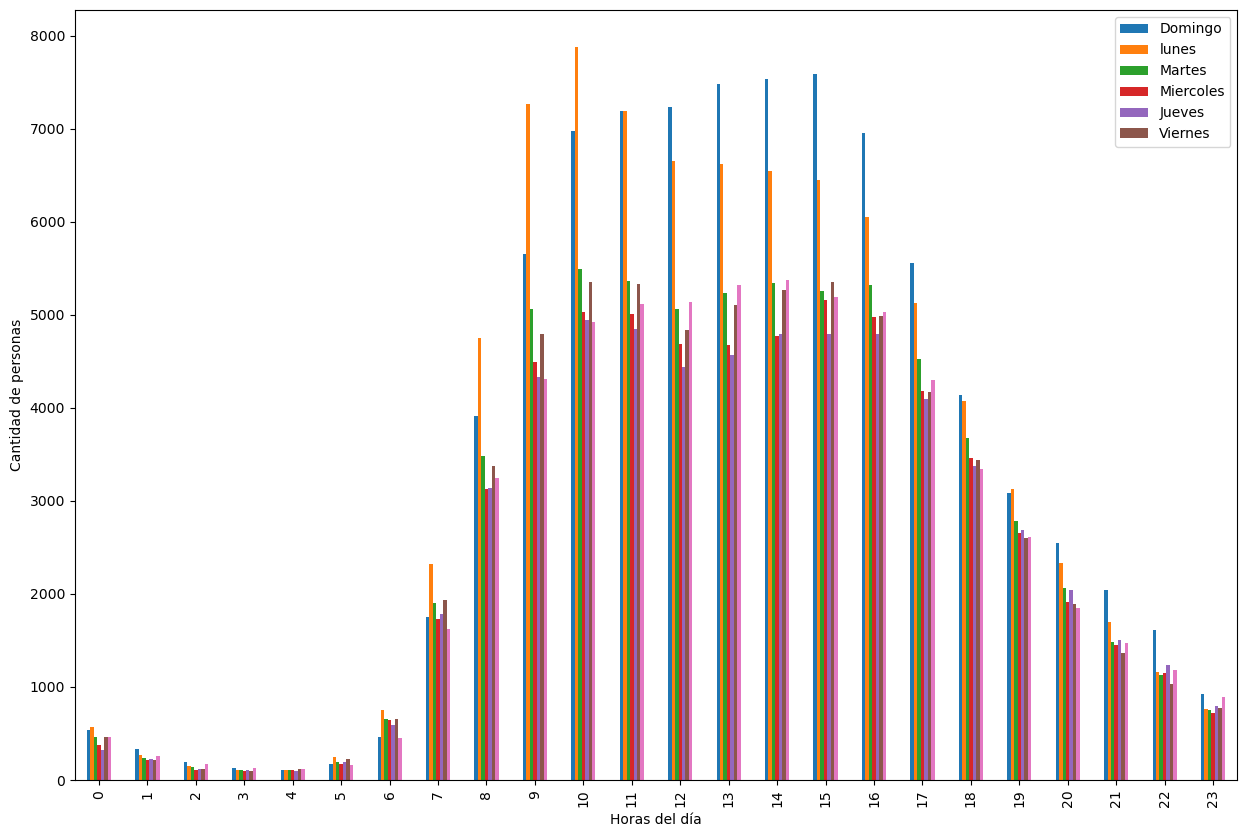

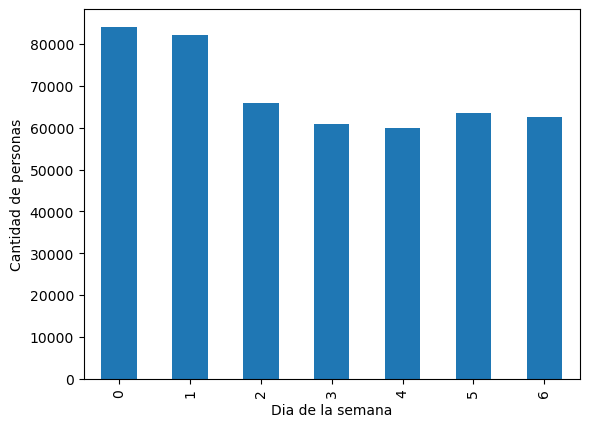

count        7.000000
mean     68421.714286
std      10247.547409
min      59810.000000
25%      61773.000000
50%      63488.000000
75%      74009.000000
max      84090.000000
Name: user_id, dtype: float64

In [49]:
deck_val2 = df_orders.groupby('order_dow')['user_id'].count()
print(deck_val2)

d_comp = df_orders.pivot_table(index='order_dow', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='order_hour_of_day', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='user_id', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='count' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )
print(d_comp)

h_dia.plot(kind='bar', figsize=[15, 10], xlabel="Horas del día", ylabel="Cantidad de personas")
plt.legend(["Domingo" , "lunes", "Martes", "Miercoles", "Jueves", "Viernes"])
plt.show()

deck_val2.plot(kind='bar', xlabel="Dia de la semana", ylabel="Cantidad de personas")
plt.show()


deck_val2.describe()


El dia que se establece que se tiene mayor flujo es el dia Domingo y el dia que presenta menor compra es el dia jueves , se cuenta que el promedio de compra es de 68421 que realizan los compradores.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

order_dow                   0     1     2     3     4     5     6
days_since_prior_order                                           
0.0                      1277  1743  1352  1324  1343  1380  1170
1.0                      2630  2674  3709  3122  2920  2878  2246
2.0                      3730  3276  3729  5065  4367  4102  2869
3.0                      4270  4966  3292  4412  5375  4538  3371
4.0                      4611  5393  4358  3395  4371  5410  3468
5.0                      4547  5343  4404  4096  3241  4419  4046
6.0                      6068  5861  4198  3804  3905  3906  6188
7.0                     10486  9101  4587  4066  4202  5848  6287
8.0                      5107  4518  4334  2892  2759  2883  2868
9.0                      2644  2421  2651  2804  2287  2082  1864
10.0                     1969  2447  1612  1951  2088  1789  1453
11.0                     1749  2055  1692  1274  1568  1781  1348
12.0                     1665  1978  1565  1396  1098  1538  1418
13.0      

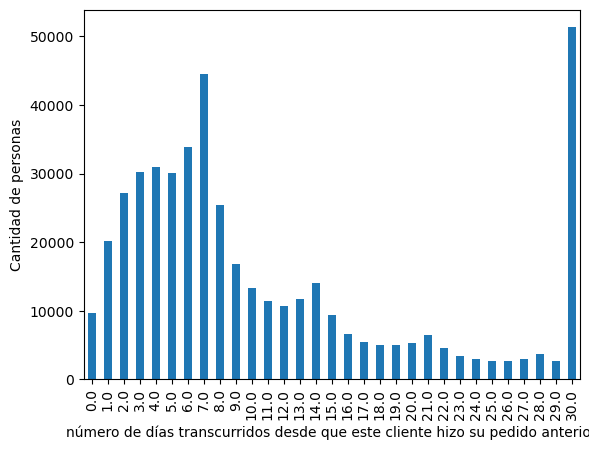

El número de días minimo transcurridos desde que este cliente hizo su pedido anterior fue de: 29 dias con: 2640
El número de días maximo transcurridos desde que este cliente hizo su pedido anterior fue de: 30 dias con: 51337


In [50]:
t_pedido = df_orders.pivot_table(index='days_since_prior_order', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='order_dow', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='user_id', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='count' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )

print(t_pedido)
print()
deck_val3 = df_orders.groupby('days_since_prior_order')['user_id'].count()
print(deck_val3)

deck_val3.plot(kind='bar', xlabel="número de días transcurridos desde que este cliente hizo su pedido anterior", ylabel="Cantidad de personas")
plt.show()

print("El número de días minimo transcurridos desde que este cliente hizo su pedido anterior fue de: 29 dias con:", deck_val3.min())
print("El número de días maximo transcurridos desde que este cliente hizo su pedido anterior fue de: 30 dias con:", deck_val3.max())

Se establece que las personas tiene un comportamiento en realizar su requerimientos a largo plazo. Se evidencia en los datos que las personas tiene un comportamiento en realizar su requerimientos los cuales son los siguientes, que los consumidores tienden a regularizar su compra o esperar hasta este dia y el valor maximo que es 30 indica que la mayoria de los consumidores si esperan para realizar su compra cumliendo 30 dias, lo cual indica que regularizan sus compras y reordenan cada 30 dias.

De acuerdo a la informacion presentada, lo que puede suceder para un comportamiento asi es:

    - El sistema presenta un parametro en donde dias superirores a 30 por default se asignen a 30, esto se soporta ya que el
    pico esta en este dia.
    - el comportamiento de los dias anteriores desde el dia 8 presenta un decremcimiento y es atipico presentar en un solo
    momento una subida repentina.
Con base en esta informacion se deberia recomerdar y realizar un zoom a este detalle para tener una mejor data para toma de decisiones y establecer que es lo que realmente sucede.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [51]:
mys_com = df_orders[(df_orders['order_dow'] == 3) | (df_orders['order_dow'] == 6)]
print(mys_com) #se filtra dataframe con los datos de miercoles y sabado especificamente para el analisis


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
6        2511640   148233            40          3                  8   
11        102585   191558            18          6                 16   
14       2843219    74699             4          6                 11   
16       3109465    55090            19          3                 15   
...          ...      ...           ...        ...                ...   
478939    984024    47076             2          6                 21   
478941    640934    27104             9          3                 10   
478946   3006133    34561             7          6                 10   
478948   3270802   112087             2          3                 13   
478950    216274     4391             3          3                  8   

        days_since_prior_order  
0                         30.0  
6                          2.0  
11                      

In [52]:
mys_comp2 = mys_com.pivot_table(index='order_hour_of_day', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='order_dow', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='user_id', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='count' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )
print(mys_comp2)

order_dow             3     6
order_hour_of_day            
0                   373   464
1                   215   254
2                   106   177
3                   101   125
4                   108   118
5                   170   161
6                   643   451
7                  1732  1619
8                  3125  3246
9                  4490  4311
10                 5026  4919
11                 5004  5116
12                 4688  5132
13                 4674  5323
14                 4774  5375
15                 5163  5188
16                 4976  5029
17                 4175  4295
18                 3463  3338
19                 2652  2610
20                 1917  1847
21                 1450  1473
22                 1154  1185
23                  718   893


In [53]:
deck_val4 = df_orders[df_orders['order_dow']== 3] #se filtra solo los valores del dia miercoles
deck_val4 = deck_val4['user_id'].count() # se realiza conteo de acuerdo a la cantidad de usuarios
print("El valor total del dia miercoles es igual a ", deck_val4) #se muestra cual es el valor total de datos del dia miercoles
deck_val5 = df_orders[df_orders['order_dow']== 6] #se filtra solo los valores del dia sabado
deck_val5 = deck_val5['user_id'].count() #se realiza conteo de acuerdo a la cantidad de usuarios
print("El valor total del dia sabado es igual a ", deck_val5) #se muestra cual es el valor total de datos del dia Jueves

El valor total del dia miercoles es igual a  60897
El valor total del dia sabado es igual a  62649


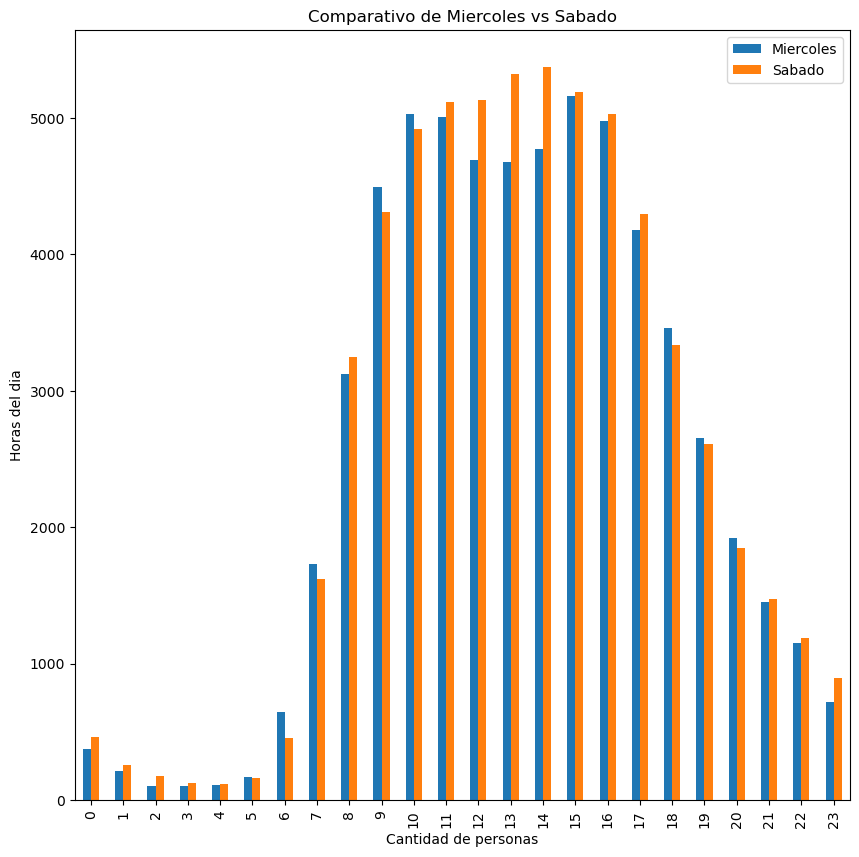

In [54]:
mys_comp2.plot(kind='bar', #se realiza grafica de miercoles vs sabado 
        title='Comparativo de Miercoles vs Sabado',  
        xlabel='Cantidad de personas', 
        ylabel='Horas del dia',
              figsize=[10, 10] )

plt.legend(['Miercoles', 'Sabado'])
plt.show()

Se establece un comportamiento muy similar los dias miercoles y sabado, pero marca la diferencia que el sabado tiene una mayor afluencia. Otro punto es que hay 3 franjas horarias en donde el miercoles supera al sabado, estas franjas son de 5:00 am a 7:00 am, 9:00 am a 10:00 am y de 18:00 pm a 20:00 am.
Otra diferencia que se presenta es que ambas tiene un flujo tipo campana donde arranca bajo de afluencia posteriormente sube de casi 5 veces mas de su inicio y nuevamente vuelve a disminuir.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [55]:
deck_val6 = df_orders.groupby('order_number')['user_id'].count() #agrupacion de cantidad de veces que un cliente realiza n pedidos de acuerdo al cliente
print(deck_val6)
print()
comp1reor = df_orders[df_orders['order_number']== 1] #validacion para el número de órdenes que hacen los clientes es decir, cuántos clientes hicieron solo 1 pedido
print(comp1reor)

order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   

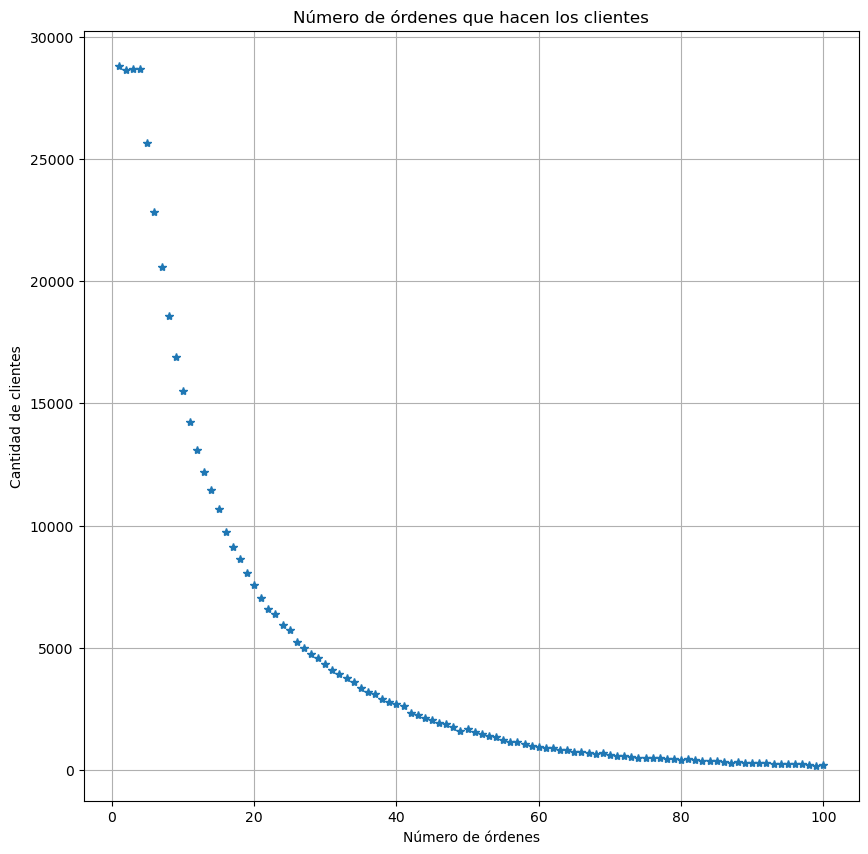

In [56]:
deck_val6.plot(style='*', title='Número de órdenes que hacen los clientes', grid=True, xlabel="Número de órdenes", ylabel="Cantidad de clientes",
              figsize=[10, 10]) #se grafican datos y se valida comportamiento de estos con base en el grafico proporcionado
plt.show()

Se observa en la grafica que presenta un comportamiento de reduccion o decrecimiento, en donde implica que los clientes su repetitivilidad en la compras es muy poca, que es el comportamiento que indica la grafica una compra alto cliente, y se presenta una tendencia de reduccion alta repetitividad de compras pocos cliente que repiten. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [57]:
df_m = df_order_products.merge(df_products, on='product_id', how="left") #se hace una combinacion de dosdataframe para incluir los nombres
display(df_m.head(10))

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16
5,2456893,21616,4,1,ORGANIC BABY ARUGULA,123,4
6,644579,12341,5,1,HASS AVOCADOS,32,4
7,2231852,44925,10,1,NATURAL PROVOLONE CHEESE SLICES,21,16
8,3185766,36259,14,1,WHOLE NATURAL VALUE PACK ALMONDS,117,19
9,420019,23315,4,1,ORGANIC COLD BREW COFFEE,26,7


In [58]:
deck_val7 = df_m.groupby(by =['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False) #agrupacion de cantidad de veces que un producto  es pedido en las ordenes

In [59]:
deck_val7=deck_val7.head(20) #se crea variable para los 20 primero producto ya que tiene una organizacion de mayor a menor
print(deck_val7)

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64


Realizando el analisis respectivo se establece que los productos de mayor consumo son productos de alimentacion, organicos y estan focalizados en frutas.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [60]:
df_m2 = df_order_products.merge(df_orders, on='order_id', how="left")
display(df_m2)

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8.0
1,567889,1560,1,1,129474,16,1,13,14.0
2,2261212,26683,1,1,47476,5,6,9,13.0
3,491251,8670,35,1,134505,27,6,13,9.0
4,2571142,1940,5,1,155995,22,5,13,5.0
...,...,...,...,...,...,...,...,...,...
4545002,577211,15290,12,1,76414,30,2,15,13.0
4545003,1219554,21914,9,0,163902,19,1,1,3.0
4545004,692640,47766,4,1,597,3,0,20,30.0
4545005,319435,691,8,1,7124,6,5,14,24.0


order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
2231165      1
816908       1
2230951      1
112056       1
3421079      1
Name: product_id, Length: 450046, dtype: int64

El promedio de articulos que suele comprar es de:  10.098983215049127


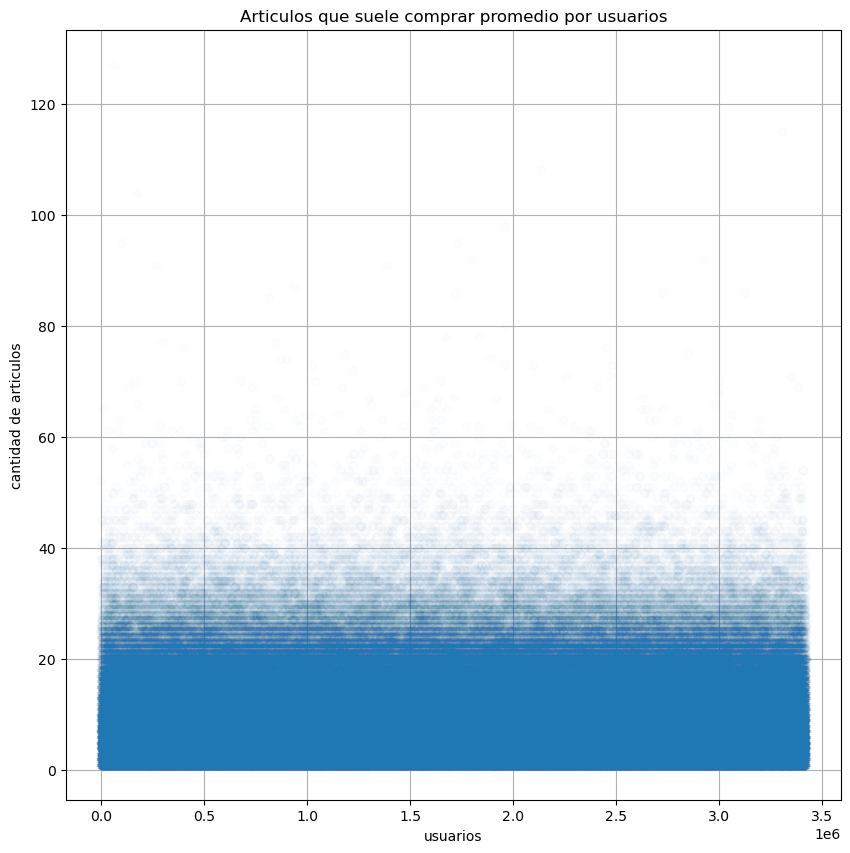

In [61]:
deck_val7 = df_m2.groupby('order_id')['product_id'].count().sort_values(ascending=False)#se establece cuanta es la cantidad de productos se adquiere por orden
deck_val8 = deck_val7.mean() #se valida cual es el promedio de productos se piden en general por ordenes
print(deck_val7)
print()
print("El promedio de articulos que suele comprar es de: ", deck_val8)
deck_val7.plot(        #plot(): método de pandas que prepara la imagen con los datos.
        title='Articulos que suele comprar promedio por usuarios', # se define el titulo del grafico
        style='o',      # se define el estilo del grafico
        xlabel="usuarios",   # se define leyenda del eje x esta es una opcion
        ylabel="cantidad de articulos",   # se define leyenda del eje y esta es una opcion
        grid=True,               # se define cuadricula
        figsize=[10, 10], alpha=0.01          # se define tamaño de la grafica
)


plt.show()
#print(df_m2.loc[df_m2['order_id'] == 1959075])

In [62]:
deck_val7.describe()#se muestra valores de la variable y se establece la cantidad minima de producto en una orden, la cantidad 
#maxima de producto en una orden y su promedio de articulosen una orden.

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

se realiza la verificacion de los datos y se establece que el promedio de articulos que se compran por los clientes esde 10 articulos, adicional lo minimo que compran los clientes es un articulo y lo maximo que se llego a comprar de articulos es de 127.

Se realiza grafico en donde se evidencia que la mayor cantidad de agrupacion de cantidad de articulos que compran por cliente se ubica por debajo de 20, se realiza grafico donde los puntos se utiliza la transparencia y donde se focaliza el color es donde se evidencia la concentracion de los datos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [63]:
df_m3 = df_m.loc[df_m['reordered'] == 1] #se toma el dataframe donde ya esta combinado el ID del producto y el nombre, se filtra por los que ya se han requerido nuevamente

In [64]:
display(df_m3.head(10))

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16
5,2456893,21616,4,1,ORGANIC BABY ARUGULA,123,4
6,644579,12341,5,1,HASS AVOCADOS,32,4
7,2231852,44925,10,1,NATURAL PROVOLONE CHEESE SLICES,21,16
8,3185766,36259,14,1,WHOLE NATURAL VALUE PACK ALMONDS,117,19
9,420019,23315,4,1,ORGANIC COLD BREW COFFEE,26,7
10,925051,9421,2,1,ORGANIC RAW MULTIGREEN KOBMBUCHA,31,7


In [65]:
deck_val8 = df_m3.groupby(by =['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False) #se realiza conteo del producto en las ordenes

In [66]:
deck_val8=deck_val8.head(20)

print(deck_val8)

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: order_id, dtype: int64


Realizando el analisis respectivo se establece que los productos de mayor consumo y que son requerido nuevemente son productos de alimentacion, organicos y estan focalizados en frutas.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [67]:
deck_val9 = df_m.groupby(by =['product_id', 'product_name'])['reordered'].count().sort_values(ascending=False) #se establece producto su conteo
deck_val10 = deck_val9.sum() #se realiza un conteo total de los productos

deck_val11 = deck_val9 / deck_val10 #se establece la proporcion por producto

In [68]:
#print(deck_val9)
#print()
#print(deck_val10)
#print()
print(deck_val11)


product_id  product_name                                          
24852       BANANA                                                    1.453243e-02
13176       BAG OF ORGANIC BANANAS                                    1.172649e-02
21137       ORGANIC STRAWBERRIES                                      8.149382e-03
21903       ORGANIC BABY SPINACH                                      7.474356e-03
47209       ORGANIC HASS AVOCADO                                      6.550705e-03
                                                                          ...     
5836        ARCTIC D COD LIVER OIL LEMON                              2.200217e-07
43573       WHISK- 10 INCH                                            2.200217e-07
43570       QUESO COTIJA                                              2.200217e-07
36174       WHOLE PINTO BEANS                                         2.200217e-07
41403       EXTRA RICH & THICK SPAGHETTI SAUCE SPICES & SEASONINGS    2.200217e-07
Name: reordered, Len

In [69]:
deck_val12 = df_m.groupby(by =['product_id', 'product_name'])['reordered'].mean().sort_values(ascending=False)#se establece elpromedio para requerirlo nuevamente
print()
print(deck_val12)


product_id  product_name                                                                 
14721       BONE STRENGTH TAKE CARE                                                          1.0
20949       VANILLA SANDWICH COOKIES                                                         1.0
6723        PALMIERS- PETITE                                                                 1.0
6732        NATURALLY SPARKLING MINERAL WATER                                                1.0
45088       CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & OLIVE OIL INFUSION                 1.0
                                                                                            ... 
10485       CARAMEL APPLE POP                                                                0.0
37690       CALYPSO FRESH 2X CONCENTRATED SCENTSATIONS 166 LOADS LIQUID LAUNDRY DETERGENT    0.0
10484       AVOCADO AND GREENS                                                               0.0
10474       NUSTEVIA WHITE STEVIA PO

Se establece cual el proporcion de cada producto al requerir con base en la informacion se evidencia que del producto BANANA con product_id 24852 tiene el 1.45% que sea seleccionado en un pedido y un 1 para reordenarlo en la siguiente compra. En este caso se especifica para este producto y asi sucesivamente con los demas productos.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [70]:
df_mp = df_m2.loc[df_m2['reordered'] == 1]

deck_val13 = df_mp.groupby('user_id')['reordered'].count().sort_values(ascending=False)
#display(df_mp)

en este sentido realizo el merge del dataframe instacart_orders y el dataframe order_products. se realiza y con base en este se realiza una agrupacion por el  cliente, con el producto y se realiza la media de acuerdo al reordenamiento.
    Alineo a lo que me indicas, y realizo el ajuste respectivo, quedo pendiente si se aborda bien. Se toma el dataframe especifico y se realiza un filtro en donde se dejan los prodcutos reodenados, una vez realizado esto se procede a realizar filtro por cliente de los productos reodenados (1), posteriormente se filtra por user_id, realizando un conteo cuanto reordenan.

In [71]:
prop_reord = df_m2.groupby('user_id')['reordered'].mean().sort_values(ascending=False)
display(prop_reord)

user_id
137587    1.0
173474    1.0
13918     1.0
62300     1.0
62307     1.0
         ... 
190953    0.0
119371    0.0
63173     0.0
63163     0.0
165726    0.0
Name: reordered, Length: 149626, dtype: float64

In [72]:
print(deck_val13)

user_id
103634    477
164055    449
137629    444
33731     437
59819     436
         ... 
77356       1
77348       1
193229      1
77324       1
2           1
Name: reordered, Length: 132991, dtype: int64


Se realiza confirmacion que cliente tiene cierta cantidad de reordenes y son los que tiene un mayor peso.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [73]:
display(df_m.head(10)) #se muestra valores del df combinado donde se debe realizar filtrado por el producto que se escoge de primero

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16
5,2456893,21616,4,1,ORGANIC BABY ARUGULA,123,4
6,644579,12341,5,1,HASS AVOCADOS,32,4
7,2231852,44925,10,1,NATURAL PROVOLONE CHEESE SLICES,21,16
8,3185766,36259,14,1,WHOLE NATURAL VALUE PACK ALMONDS,117,19
9,420019,23315,4,1,ORGANIC COLD BREW COFFEE,26,7


In [75]:
df_m5 = df_m.loc[df_m['add_to_cart_order'] == 1] #filtro de df con productos que se escogen de primero
display(df_m5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
14,1961225,37553,1,1,ICED COFFEE LIGHTLY SWEET,26,7
16,639939,10017,1,1,TILAPIA FILET,39,12
23,750040,8518,1,0,ORGANIC RED ONION,83,4
...,...,...,...,...,...,...,...
4544978,1759009,46175,1,0,HALF BAKED® ICE CREAM,37,1
4544989,115427,20842,1,1,TOTAL 0% GREEK YOGURT,120,16
4544990,2049780,28576,1,1,VANILLA BEAN CHIA POD,120,16
4544997,2300092,10017,1,0,TILAPIA FILET,39,12


In [76]:
deck_val14 = df_m5.groupby(by =['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False)#realizar conteo dedel prodcuto por orden
deck_val14=deck_val14.head(20) #se muestran los 20 primero y se asigna a nuvea variables

print(deck_val14)

product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK     1310
27086       HALF & HALF                     1309
43352       RASPBERRIES      

Se muestra los 20 primeros articulos que son elegidos de primeros en los carritos para cualquier pedido, se evidencia que la mayoria son alimentos (frutas y vegetales) y en segundo hay bedidas.

### Conclusion general del proyecto:

Proyecto que abarca primero con varios dataframe para realizar una analsisis y cruces de informacion.

    - Donde se realiza un primer paso general con la validacion de información, depuración y confirmacion de datos.
    - Se realizar el uso de diferentes funciones para la combrobacion de informacion, limpieza y ajuste de información.
    - Por ultimo se aborda todo analisis y cruce de dataframe con el fin de aclarar dudas, lo cual es soportado en graficas que

    visualmente aclarar resultados y permite toma de decisiones. y establecer:

        - Patrones de consumo, cual es el producto estrella que es requerido en las compras (24852 - BANANA), la cual 
        en las ordenes generales fue la más solicitada, en las ordenes que tuvieron reordenes tuvo el mismo comportamiento
        ademas fue el articulo con mayor relevancia para incluirlo en el carrito de compras.      
        - Se establecen patrones de conductas de los usuarios, donde se identifican los picos donde se registran las mayor
        ordenes de compra (franja horaria desde las 10:00 am hasta las 14:00 pm), se establece el dia de mayor flujo que es el
        domingo, los dias que transcurren para realizan un pedido.

Todo el flujo que se establece en el proyecto permite establecer.

    - Toma de decisiones.
    - Mejorar al proceso.
    - Focalizacion de recursos.
    - Maximizacion de las ganancias.
    
      